In [14]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#importing dataset
df=pd.read_csv('/content/AI_Resume_Screening.csv')

In [16]:
#top  5 rows
df.head()

,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


In [17]:
#last 5 rows
df.tail()

,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
995,996,Brenda Williams,"Cybersecurity, Linux, Ethical Hacking",0,B.Sc,NaN,Cybersecurity Analyst,Reject,114364,9,60
996,997,Colleen Hicks,"Deep Learning, Machine Learning",0,MBA,Deep Learning Specialization,Data Scientist,Reject,103294,5,45
997,998,Michelle Molina,"TensorFlow, NLP",0,B.Tech,Google ML,AI Researcher,Hire,113855,9,65
998,999,Danielle Horn,"Linux, Networking, Cybersecurity, Ethical Hacking",8,PhD,AWS Certified,Cybersecurity Analyst,Hire,83146,10,100
999,1000,Chad Collins,"SQL, Machine Learning, Python, Deep Learning",7,M.Tech,Deep Learning Specialization,Data Scientist,Hire,119474,3,100


In [18]:
#checking missing values
df.isnull().sum()


,0
Resume_ID,0
Name,0
Skills,0
Experience (Years),0
Education,0
Certifications,274
Job Role,0
Recruiter Decision,0
Salary Expectation ($),0
Projects Count,0


In [19]:
#fill 'Certifications' column
df['Certifications'] = df['Certifications'].replace("None", np.nan)
df['Certifications'].fillna("No Certification", inplace=True)


<ipython-input-19-d03820a23c82>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certifications'].fillna("No Certification", inplace=True)


In [20]:
df.isnull().sum()

,0
Resume_ID,0
Name,0
Skills,0
Experience (Years),0
Education,0
Certifications,0
Job Role,0
Recruiter Decision,0
Salary Expectation ($),0
Projects Count,0


In [21]:
# Encode 'Recruiter Decision' (Binary)
df['Recruiter Decision'] = df['Recruiter Decision'].map({'Hire': 1, 'Reject': 0})

# One-hot encode 'Job Role'
df = pd.get_dummies(df, columns=['Job Role'])

# Label encode 'Education'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])


In [22]:
#Normalize/Standardize Numerical Features
from sklearn.preprocessing import StandardScaler

num_cols = ['Experience (Years)', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


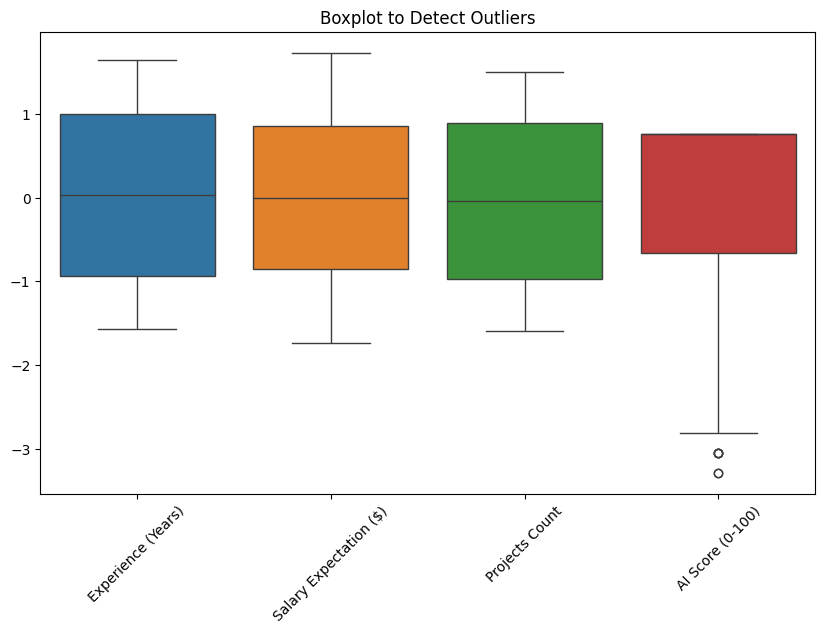

In [23]:
#Visualize and Handle Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot to Detect Outliers")
plt.xticks(rotation=45)
plt.show()
